In [0]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DecimalType, TimestampType, DateType, BooleanType
from pyspark.sql import column as col
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date


# # ############################################
# # #Riders datasets
riders_00 = "/FileStore/tables/riders.csv"
results_schema = StructType(fields=[StructField("rider_id",IntegerType(),False),
                                    StructField("first_name",StringType(),True),
                                    StructField("last_name", StringType(), True),
                                    StructField("address",StringType(),True),
                                    StructField("birthday_date", StringType(), True),
                                    StructField("account_start_date", DateType(), True),
                                    StructField("account_end_date", DateType(), True),
                                    StructField("is_member", BooleanType(), True)])

df_riders= spark.read.schema(results_schema).csv("/FileStore/tables/riders.csv")
#df_riders.display()
#df_riders.printSchema()


# # ############################################
# # #Payments dataset
payments_data = "/FileStore/tables/payments.csv"
results_schema2 = StructType(fields=[StructField("payment_id",IntegerType(),False),
                                    StructField("date",DateType(),True),
                                    StructField("amount",DecimalType(),True),
                                    StructField("rider_id", IntegerType(), True)])
df_payment= spark.read.schema(results_schema2).csv("/FileStore/tables/payments.csv")
#df_payment.display()
# # df_payment.printSchema()




# # ############################################
# #stations dataset
stations_data = "/FileStore/tables/stations.csv"
results_schema_Station= StructType(fields=[StructField("station_id",IntegerType(),False),
                                    StructField("name",StringType(),True),
                                    StructField("longitude",FloatType(),True),
                                    StructField("latitude", FloatType(), True)])
df_stations= spark.read.schema(results_schema_Station).csv("/FileStore/tables/stations.csv")

# # # df_stations.display()
# # df_stations.printSchema()


############################################
#Trips Dataset
trips_data = "/FileStore/tables/trips.csv"
results_schema3 = StructType(fields=[StructField("trip_id",StringType(),False),
                                    StructField("rideable_type",StringType(),True),                                                                                       StructField("started_at",StringType(),True), # not responding for TimestampType and datetype.
                                    StructField("ended_at",StringType(),True),
                                    StructField("start_station_id",IntegerType(),True),
                                    StructField("end_station_id",IntegerType(),True),
                                    StructField("member_id", IntegerType(), True)])
df_trips= spark.read.schema(results_schema3).csv("/FileStore/tables/trips.csv")

df_trips= df_trips.withColumn("started_at",df_trips.started_at.cast(TimestampType()))
# # df_trips.display()
# df_trips.printSchema()


In [0]:
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.functions import dayofmonth
from pyspark.sql.functions import to_date
from dateutil.parser import parse
#spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
        
raw_data= spark.read.schema(results_schema3).csv("/FileStore/tables/trips.csv")
data= raw_data.withColumn('started_at', to_timestamp(col("started_at"),"dd/MM/yyyy HH:mm").alias("started_at")) \
             .withColumn('ended_at', to_timestamp(col("ended_at"),"dd/MM/yyyy HH:mm").alias("ended_at"))


#Calculating time duration of the journey, finding week_day_number and week_day_name
df_trips= data.withColumn(
    "Trip_Duration_Minutes", 
    (F.col("ended_at").cast("long") - F.col("started_at").cast("long"))/60) \
          .withColumn("week_day_number", date_format(col("started_at"), "u")) \
          .withColumn("week_day_name", date_format(col("started_at"), "EEEE")) \
          .withColumn("Trip_start_date_month", month(data.started_at).cast('int'))

df_trips= df_trips.withColumn("week_day_number", df_trips.week_day_number.cast('integer'))

df_trips.display()

trip_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_id,Trip_Duration_Minutes,week_day_number,week_day_name,Trip_start_date_month
89E7AA6C29227EFF,classic_bike,2021-02-12T16:14:00.000+0000,2021-02-12T16:21:00.000+0000,525,660,71934,7.0,5,Friday,2
0FEFDE2603568365,classic_bike,2021-02-14T17:52:00.000+0000,2021-02-14T18:12:00.000+0000,525,16806,47854,20.0,7,Sunday,2
E6159D746B2DBB91,electric_bike,2021-02-09T19:10:00.000+0000,2021-02-09T19:19:00.000+0000,null,null,70870,9.0,2,Tuesday,2
B32D3199F1C2E75B,classic_bike,2021-02-02T17:49:00.000+0000,2021-02-02T17:54:00.000+0000,637,null,58974,5.0,2,Tuesday,2
83E463F23575F4BF,electric_bike,2021-02-23T15:07:00.000+0000,2021-02-23T15:22:00.000+0000,13216,null,39608,15.0,2,Tuesday,2
BDAA7E3494E8D545,electric_bike,2021-02-24T15:43:00.000+0000,2021-02-24T15:49:00.000+0000,18003,null,36267,6.0,3,Wednesday,2
A772742351171257,classic_bike,2021-02-01T17:47:00.000+0000,2021-02-01T17:48:00.000+0000,null,null,50104,1.0,1,Monday,2
295476889D9B79F8,classic_bike,2021-02-11T18:33:00.000+0000,2021-02-11T18:35:00.000+0000,18003,18003,19618,2.0,4,Thursday,2
362087194BA4CC9A,classic_bike,2021-02-27T15:13:00.000+0000,2021-02-27T15:36:00.000+0000,null,null,16732,23.0,6,Saturday,2
21630F715038CCB0,classic_bike,2021-02-20T08:59:00.000+0000,2021-02-20T09:17:00.000+0000,null,null,57068,18.0,6,Saturday,2


rider_id,first_name,last_name,address,birthday_date,account_start_date,account_end_date,is_member,age,year_account_start_date
1000,Diana,Clark,1200 Alyssa Squares,1989-02-13,2019-04-23,null,true,34,2019
1001,Jennifer,Smith,397 Diana Ferry,1976-08-10,2019-11-01,2020-09-01,true,46,2019
1002,Karen,Smith,644 Brittany Row Apt. 097,1998-08-10,2022-02-04,null,true,24,2022
1003,Bryan,Roberts,996 Dickerson Turnpike,1999-03-29,2019-08-26,null,false,24,2019
1004,Jesse,Middleton,7009 Nathan Expressway,1969-04-11,2019-09-14,null,true,54,2019
1005,Christine,Rodriguez,224 Washington Mills Apt. 467,1974-08-27,2020-03-24,null,false,48,2020
1006,Alicia,Taylor,1137 Angela Locks,2004-01-30,2020-11-27,2021-12-01,true,19,2020
1007,Benjamin,Fernandez,979 Phillips Ways,1988-01-11,2016-12-11,null,false,35,2016
1008,John,Crawford,7691 Evans Court,1987-02-21,2021-03-28,2021-07-01,true,36,2021
1009,Victoria,Ritter,9922 Jim Crest Apt. 319,1981-02-07,2020-06-12,2021-11-01,true,42,2020


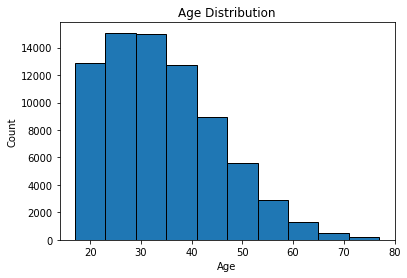

In [0]:
from pyspark.sql import functions as F
df_riders = df_riders.withColumn('age', (F.months_between(current_date(), F.col('birthday_date')) / 12).cast('int'))
# df_riders.display()
# df_riders.printSchema()

#separate month and year from account_start_date
df_riders = df_riders.withColumn('year_account_start_date', year(df_riders.account_start_date).cast('int'))
df_riders.display()

# #Visualize Age Distribution across the data
import matplotlib.pyplot as plt
df_riders_toPandas= df_riders.toPandas()

plt.hist(df_riders_toPandas.age, bins=10, edgecolor='black')
# Set the title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

In [0]:
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date
df_payment.printSchema()
df_payment = df_payment.withColumn('year_date',year(df_payment.date)) \
                       .withColumn('month_date',month(df_payment.date)) \
                       .withColumn('quarter_date',quarter(df_payment.date))

df_payment.display()

root
 |-- payment_id: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- amount: decimal(10,0) (nullable = true)
 |-- rider_id: integer (nullable = true)
 |-- year_date: integer (nullable = true)
 |-- month_date: integer (nullable = true)
 |-- quarter_date: integer (nullable = true)



payment_id,date,amount,rider_id,year_date,month_date,quarter_date
1,2019-05-01,9,1000,2019,5,2
2,2019-06-01,9,1000,2019,6,2
3,2019-07-01,9,1000,2019,7,3
4,2019-08-01,9,1000,2019,8,3
5,2019-09-01,9,1000,2019,9,3
6,2019-10-01,9,1000,2019,10,4
7,2019-11-01,9,1000,2019,11,4
8,2019-12-01,9,1000,2019,12,4
9,2020-01-01,9,1000,2020,1,1
10,2020-02-01,9,1000,2020,2,1


In [0]:
#Creating Dimension Table

df_trips.createOrReplaceTempView("df_trips_dim_table")
df_riders.createOrReplaceTempView("df_riders_dim_table")
df_payment.createOrReplaceTempView("df_payment_dim_table")
df_stations.createOrReplaceTempView("df_stations_dim_table")


## Creating Fact Table

fact_table= spark.sql("SELECT df_trips_dim_table.trip_id, df_trips_dim_table.start_station_id, df_trips_dim_table.end_station_id, df_trips_dim_table.member_id, df_riders_dim_table.rider_id, df_trips_dim_table.Trip_Duration_Minutes ,  df_riders_dim_table.age, df_payment_dim_table.payment_id, df_payment_dim_table.amount  FROM  df_trips_dim_table    FULL JOIN df_stations_dim_table ON df_stations_dim_table.station_id = df_trips_dim_table.start_station_id  FULL JOIN df_payment_dim_table ON  df_trips_dim_table.member_id = df_payment_dim_table.rider_id  FULL JOIN df_riders_dim_table ON df_riders_dim_table.rider_id = df_payment_dim_table.rider_id WHERE  df_trips_dim_table.trip_id IS NOT NULL AND member_id IS NOT NULL AND df_trips_dim_table.end_station_id IS NOT NULL  AND df_trips_dim_table.start_station_id IS NOT NULL")
fact_table.createOrReplaceTempView("fact_table")
fact_table.display()

trip_id,start_station_id,end_station_id,member_id,rider_id,Trip_Duration_Minutes,age,payment_id,amount
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001654,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001655,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001656,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001657,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001658,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001659,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001660,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001661,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001662,9
7DF4C2D21E1DDD46,525,605,39717,39717,30.0,27,1001663,9


● Based on date and time factors such as day of week and time of day

● Based on which station is the starting and / or ending station

● Based on age of the rider at time of the ride

● Based on whether the rider is a member or a casual rider

week_day_name,Trip_Duration_Minutes_sum
Saturday,588.0
Sunday,340.0
Tuesday,335.0
Friday,299.0
Wednesday,293.0
Thursday,237.0
Monday,201.0


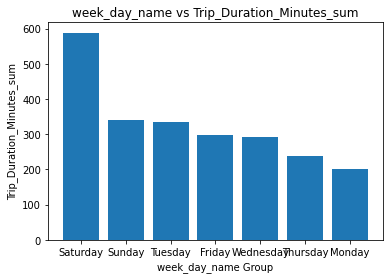

In [0]:
# df_trips.createOrReplaceTempView("df_trips_dim_table")
df_trips_dim_table_answer_01= spark.sql("SELECT df_trips_dim_table.week_day_name, SUM(df_trips_dim_table.Trip_Duration_Minutes) AS Trip_Duration_Minutes_sum  FROM df_trips_dim_table GROUP BY week_day_name SORT BY Trip_Duration_Minutes_sum DESC ")
df_trips_dim_table_answer_01.display(2)

#****************************************************************

###01:  Analyse how much time is spent per ride: Based on day of week and time of day 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


df_trips_dim_table_pd= df_trips_dim_table_answer_01.toPandas()
plt.bar(df_trips_dim_table_pd["week_day_name"], df_trips_dim_table_pd["Trip_Duration_Minutes_sum"])
# Set the title and labels
plt.title('week_day_name vs Trip_Duration_Minutes_sum')
plt.xlabel('week_day_name Group')
plt.ylabel('Trip_Duration_Minutes_sum')

# Show the plot
plt.show()

In [0]:
from pyspark.sql.functions import sum, col, desc

TimeSpent_vs_start_station= spark.sql("SELECT start_station_id, sum(Trip_Duration_Minutes) as sum_Trip_Duration_Minutes FROM fact_table GROUP BY start_station_id HAVING start_station_id IS NOT NULL ORDER BY sum_Trip_Duration_Minutes DESC")
TimeSpent_vs_start_station.display()

TimeSpent_vs_end_station= spark.sql("SELECT end_station_id, sum(Trip_Duration_Minutes) as sum_Trip_Duration_Minutes FROM fact_table GROUP BY end_station_id HAVING end_station_id IS NOT NULL ORDER BY sum_Trip_Duration_Minutes DESC")
TimeSpent_vs_end_station.display()

start_station_id,sum_Trip_Duration_Minutes
13235,6460.0
623,1977.0
523,1572.0
525,1475.0
13061,920.0
13150,897.0
13285,737.0
13146,646.0
13058,644.0
13164,625.0


end_station_id,sum_Trip_Duration_Minutes
13235,6460.0
13156,3740.0
525,1480.0
13022,1230.0
15530,1082.0
623,720.0
16806,520.0
605,450.0
13353,360.0
523,338.0


Trip_Duration_Minutes,member_id,age
6460.0,18861,26
1230.0,57335,66
897.0,43658,22
870.0,26864,49
720.0,69097,40
696.0,23265,26
646.0,4411,42
644.0,13758,28
520.0,47854,40
450.0,39717,27


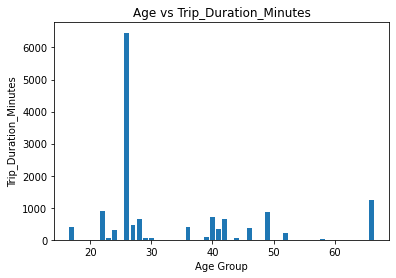

In [0]:
TimeSpent_vs_age_answer_03= spark.sql("select SUM(Trip_Duration_Minutes) AS Trip_Duration_Minutes, member_id, age  from fact_table GROUP BY member_id, age SORT BY Trip_Duration_Minutes DESC ")
TimeSpent_vs_age_answer_03.display()


#Convert table to pandas table for visualization
TimeSpent_vs_age_answer_03_pd = TimeSpent_vs_age_answer_03.toPandas()

# Create a bar chart of the Age vs Trip_Duration_Minutes
plt.bar(TimeSpent_vs_age_answer_03_pd["age"], TimeSpent_vs_age_answer_03_pd["Trip_Duration_Minutes"])
# Set the title and labels
plt.title('Age vs Trip_Duration_Minutes')
plt.xlabel('Age Group')
plt.ylabel('Trip_Duration_Minutes')

# Show the plot
plt.show()

In [0]:
timeSpent_vs_memberStatus_answer_04= spark.sql("select SUM(fact_table.Trip_Duration_Minutes) AS Trip_Duration_Minutes_sum, df_riders_dim_table.is_member from fact_table FULL JOIN df_riders_dim_table ON fact_table.member_id = df_riders_dim_table.rider_id GROUP BY df_riders_dim_table.is_member SORT BY Trip_Duration_Minutes_sum DESC ")
timeSpent_vs_memberStatus_answer_04.display()

Trip_Duration_Minutes_sum,is_member
15084.0,true
2190.0,false


Q5: Per month, quarter, year

Q6: Per member, based on the age of the rider at account start

/databricks/spark/python/pyspark/sql/pandas/utils.py:91: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [sum_of_amount] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


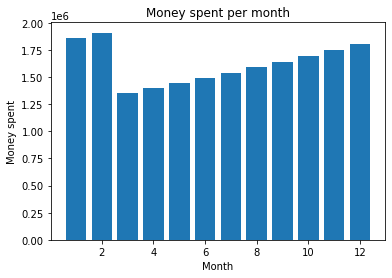

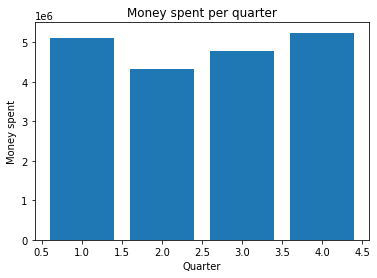

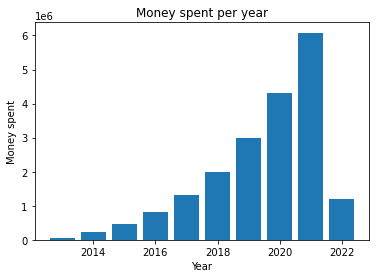

In [0]:
# #Analyse how much money is spent Per month
moneySpent_perMonth_answer_05_01= spark.sql("select sum(amount) AS sum_of_amount, month_date as payment_month from df_payment_dim_table GROUP BY payment_month  SORT BY  payment_month desc")
# #answer_05_01.display()
moneySpent_perMonth_answer_05_01toPD = moneySpent_perMonth_answer_05_01.toPandas()
plt.bar(moneySpent_perMonth_answer_05_01toPD['payment_month'], moneySpent_perMonth_answer_05_01toPD['sum_of_amount'])
plt.title('Money spent per month')
plt.xlabel('Month')
plt.ylabel('Money spent')
plt.show()


# #Analyse how much money is spent quarter
moneySpent_perQuarter_answer_05_02= spark.sql("select sum(amount) AS sum_of_amount, quarter_date as payment_quarter from df_payment_dim_table GROUP BY payment_quarter SORT BY payment_quarter asc")
# #answer_05_02.display()
moneySpent_perquarter_answer_05_02toPD = moneySpent_perQuarter_answer_05_02.toPandas()
plt.bar(moneySpent_perquarter_answer_05_02toPD['payment_quarter'], moneySpent_perquarter_answer_05_02toPD['sum_of_amount'])
plt.title('Money spent per quarter')
plt.xlabel('Quarter')
plt.ylabel('Money spent')
plt.show()


# #Analyse how much money is spent year
moneySpent_perYear_answer_05_03= spark.sql("select sum(amount) AS sum_of_amount, year_date as payment_year from df_payment_dim_table GROUP BY payment_year SORT BY payment_year asc")
# #answer_05_03.display()
moneySpent_perYear_answer_05_03toPD = moneySpent_perYear_answer_05_03.toPandas()
plt.bar(moneySpent_perYear_answer_05_03toPD['payment_year'], moneySpent_perYear_answer_05_03toPD['sum_of_amount'])
plt.title('Money spent per year')
plt.xlabel('Year')
plt.ylabel('Money spent')
plt.show()

rider_id,account_start_date,age,amount
2437,2020-07-06,44,9
2437,2021-11-26,44,9
2437,2019-10-18,44,9
2437,2018-03-09,44,9
2437,2018-04-03,44,9
2440,2020-02-17,42,9
2437,2020-03-27,44,9
2437,2021-03-05,44,9
2437,2019-12-13,44,9
2437,2019-03-29,44,9


/databricks/spark/python/pyspark/sql/pandas/utils.py:91: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [amount] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


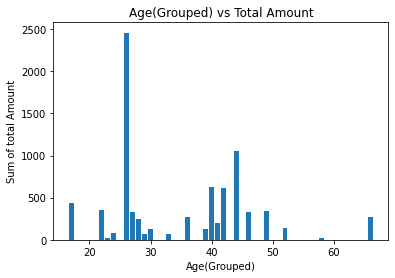

In [0]:
rider_plus_payment_per_member_answer06= spark.sql("select fact_table.rider_id, df_riders_dim_table.account_start_date, fact_table.age, fact_table.amount from df_riders_dim_table FULL JOIN fact_table ON fact_table.payment_id = df_riders_dim_table.rider_id where fact_table.age IS NOT NULL AND fact_table.rider_id IS NOT NULL AND df_riders_dim_table.account_start_date IS NOT NULL ORDER BY df_riders_dim_table.age DESC, df_riders_dim_table.account_start_date DESC")
rider_plus_payment_per_member_answer06.display()


rider_plus_payment= spark.sql("select age, sum(amount) as amount from fact_table group by age HAVING age IS NOT NULL ORDER BY age DESC")

rider_plus_payment_toPd= rider_plus_payment.toPandas()
plt.bar(rider_plus_payment_toPd['age'], rider_plus_payment_toPd['amount'])
plt.title('Age(Grouped) vs Total Amount')
plt.xlabel('Age(Grouped)')
plt.ylabel('Sum of total Amount')
plt.show()


Q7: Based on how many rides the rider averages per month

Q8 : Based on how many minutes the rider spends on a bike per month

In [0]:
money_spent_perMember_perMonth= spark.sql("select fact_table.rider_id , SUM(df_payment_dim_table.amount), df_payment_dim_table.month_date as payment_month_date from df_payment_dim_table inner join fact_table ON fact_table.member_id = df_payment_dim_table.rider_id GROUP BY  fact_table.rider_id, df_payment_dim_table.month_date  ORDER BY fact_table.rider_id DESC, df_payment_dim_table.month_date DESC ")
money_spent_perMember_perMonth.display()


rider_id,sum(amount),payment_month_date
73221,54,12
73221,54,11
73221,54,10
73221,54,9
73221,54,2
73221,54,1
73117,126,12
73117,126,11
73117,126,10
73117,126,9


In [0]:
payment_plus_trips_plus_trips_08 = spark.sql("select rider_id, SUM(Trip_Duration_Minutes) AS trip_duration_minutes, SUM(amount) as amount  from fact_table GROUP BY rider_id HAVING rider_id IS NOT NULL AND Trip_Duration_Minutes IS NOT NULL SORT BY trip_duration_minutes DESC ")
payment_plus_trips_plus_trips_08.display()

rider_id,trip_duration_minutes,amount
18861,6460.0,765
57335,1230.0,270
43658,897.0,351
26864,870.0,339
69097,720.0,200
23265,696.0,261
4411,646.0,306
13758,644.0,252
47854,520.0,234
39717,450.0,135
